We are designing a wrokflow related to test case genration using langgraph
code-review-genrate test cases- run the tests-analyzethe failed test-give summary

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x11125d880>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x11125e7b0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
class State(TypedDict):
      code: str
      reviewed_code: str
      testcases: str
      testCaseResults: str
      Summary: str


In [7]:
#nodes

def analyzeCode(state: State) -> str:
    """
    Analyze the code and return the updated code.
    """
    msg = llm.invoke(f"You are a code reviewer.Please analyze the following code and return updated code.Code: {state['code']}",)
    return {"reviewed_code":msg.content}

def analyzeTestCases(state: State) -> str:
    """
    Analyze the code  and create test cases for the reviewed_code .
    """
    msg = llm.invoke(f"You are test case creator. Genrate test cases for the reviewed_code. Test cases: {state['reviewed_code']}",)
    return {"testcases":msg.content}

def excecuteTestcases(state: State) -> str:
    """
    Execute the test cases and return the results.
    """
    msg = llm.invoke(f"Execute the test cases and return the results. Test cases: {state['testcases']}",)
    return {"testCaseResults":msg.content}

def analyzefailedResults(state: State) -> str:
    """
    Analyze the failed test cases and return the summary.
    """
    msg = llm.invoke(f"Analyze the failed test cases and return the summary. Test cases: {state['testCaseResults']}",)
    return {"Summary":msg.content}

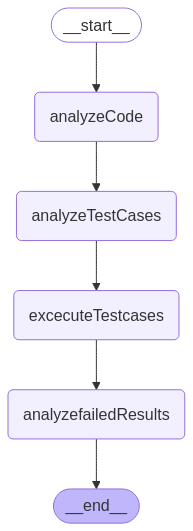

In [8]:
workflow = StateGraph(State)

workflow.add_node("analyzeCode", analyzeCode)
workflow.add_node("analyzeTestCases", analyzeTestCases)
workflow.add_node("excecuteTestcases", excecuteTestcases)
workflow.add_node("analyzefailedResults", analyzefailedResults)
workflow.add_edge(START, "analyzeCode")
workflow.add_edge("analyzeCode", "analyzeTestCases")
workflow.add_edge("analyzeTestCases", "excecuteTestcases")
workflow.add_edge("excecuteTestcases", "analyzefailedResults")
workflow.add_edge("analyzefailedResults", END)

workflow.compile()

In [12]:
graph = workflow.compile()
graph.invoke({"code":"def add_numbers(a: float, b: float) -> float:"})

{'code': 'def add_numbers(a: float, b: float) -> float:',
 'reviewed_code': '```python\ndef add_numbers(a: float, b: float) -> float:\n    """Adds two numbers together.\n\n    Args:\n        a: The first number.\n        b: The second number.\n\n    Returns:\n        The sum of the two numbers.\n    """\n    return a + b\n```\n\n**Analysis:**\n\nThe original code snippet is functional and correctly adds two floating-point numbers. However, it lacks documentation.\n\n**Improvements:**\n\n* **Docstring:** Added a docstring to explain the function\'s purpose, arguments, and return value. This improves readability and maintainability.\n\n**Explanation:**\n\n* **Docstring:**  A docstring (documentation string) enclosed in triple quotes (`"""Docstring goes here"""`) is essential for documenting your code. It clearly explains what the function does, what inputs it expects, and what output it produces.  \n\nLet me know if you\'d like me to review any other code snippets!\n',
 'testcases': "## 